### Phase 1 Project Submission

+ Student name: Wyclife Omondi Orimba
+ Student pace: Part-time
+ Scheduled project review date/time: 24th July 2023



#### PROJECT OVERVIEW

+ Microsoft has made a decision to enter the movie industry by establishing a new movie studio. However, they lack the necessary experience in the industry of entertainment to produce high-quality and original movies that appeal to a wider audience.

#### PROBLEM STATEMENT

+ Microsoft lacks experience in the entertainment industry, and this presents a major significant challenge in creating a successful movie studio. The company therefore, needs to identify the right talent, create a business plan, and establish relationships with distributors and other stakeholders to produce and distribute high-quality, original movies. Additionally, they need to ensure that the movies appeal to a wide audience and generate revenue for the company. The lack of expertise in this area could result in the production of low-quality movies that fail to generate revenue, which could negatively impact the company's reputation and financial performance. Therefore, the primary challenge is to overcome this lack of experience and create a successful movie studio that produces high-quality movies that appeal to a wide audience.


#### OBJECTIVES

+ To enter the entertainment industry through production of high-quality original movies.

+ To establish a sustainable and profitable business model for the movie studio which aligns with Microsoft's overall corporate strategy and objectives.

+ To establish a reputable and successful movie studio that contributes to Microsoft's overall growth and success.

#### SPECIFYING THE QUESTION

+ An overview and analysis of the relationship between the production budget and the gross revenue

+ Analysis of the return on investment

+ Genre analysis

#### DATA EXTRACTION

In [1]:
# importing needed libraries
import pandas as pd
import sqlite3
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###  READING DATA

+ Bom Movie Gross Data


In [2]:
#loading data and Accessing top 5 rows data on bom.movie_gross.csv.gz
movie_df = pd.read_csv ('/content/bom.movie_gross.csv')
movie_df.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#Previewing the last 5 rows of the dataset
movie_df.tail(5)

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [4]:
#Checking the shape of our dataset
movie_df.shape

(3387, 5)

In [5]:
#Checking for unique values in the dataset
movie_df.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

In [6]:
#Checking the data types of dataset
movie_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [7]:
#Checking for information of the dataset.
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### CLEANING BOM MOVIE GROSS DATA

+ The cleaning of this  dataset will entail checking for duplicates and missing values.
+ Then depending on the number of values missing, we might  group the entire column if the missing values are significant or drop either the rows with the missing values.
+ For the duplicated values in the Dataset, we will keep the first row and drop the rest of the duplicates. The data has no duplicates but has missing values so we will work on grouping the missing columns or rows.


In [8]:
#checking for  column titles on the Dataset
movie_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [9]:
#Checking for the missing values in our Dataset
movie_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [10]:
#dropping foreign_gross column as it has a significant number of missing values
movie_df.drop('foreign_gross',axis = 1, inplace = True)

In [11]:
movie_df
movie_df.shape

(3387, 4)

In [12]:
#drop missing values
movie_df.dropna()


,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [13]:
#Checking for the missing values after dropping
movie_df.isna().sum()

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [14]:
#Checking for duplicate values in the dataset
movie_df.duplicated().sum()


0

In [15]:
# Convert the 'year' column to integer data type
movie_df['year'] = movie_df['year'].astype(int)
movie_df['year']


0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3382    2018
3383    2018
3384    2018
3385    2018
3386    2018
Name: year, Length: 3387, dtype: int64

#### MOVIE BUDGETS DATA

+ tn.movie_budgets.csv.gz

In [16]:
import pandas as pd
Budget_df = pd.read_csv ('/content/Dataset - 2021.csv')
Budget_df.head(5)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,07-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,01-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
#Previewing the last 5 rows of the dataset
Budget_df.tail(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,31-Dec-18,Red 11,"$7,000",$0,$0
5778,79,02-Apr-99,Following,"$6,000","$48,482","$240,495"
5779,80,13-Jul-05,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,29-Sep-15,A Plague So Pleasant,"$1,400",$0,$0
5781,82,05-Aug-05,My Date With Drew,"$1,100","$181,041","$181,041"


In [18]:
#Checking the shape of our dataset
Budget_df.shape

(5782, 6)

In [19]:
#Checking for unique values in the Dataset
Budget_df.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

In [20]:
#Checking the different Datatypes of our dataset
Budget_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [21]:
#Checking info of the dataset
Budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Cleaning Movie Budget data

This cleaning involves checking for duplicate values and missing values.
So depending on the number of values missing, I might drop either the rows containing
the missing values or group the entire column if the missing values are significantly many.
For the duplicates, i have decided to keep the first row and drop the rest of the duplicates. As per the below code, the data has no missing values and therefore, we are working with duplicates.


In [22]:
#checking the  column titles of the Budget data
Budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [23]:
#Checking for the missing values of the data
Budget_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [24]:
#Checking for duplicates
Budget_df.duplicated().sum()

0

In [25]:
Budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [26]:
# dropping the dollar signs and commas from our dataset
Budget_df['production_budget'] = Budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
Budget_df['domestic_gross'] = Budget_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
Budget_df['worldwide_gross'] = Budget_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
Budget_df.head(5)

<ipython-input-26-f4113e80deb7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Budget_df['production_budget'] = Budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-26-f4113e80deb7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Budget_df['domestic_gross'] = Budget_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-26-f4113e80deb7>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Budget_df['worldwide_gross'] = Budget_df['worldwi

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,07-Jun-19,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,01-May-15,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [27]:
# creating a return investment(ROI) column
Budget_df['Return_on_investment'] = ((Budget_df['worldwide_gross'] - Budget_df['domestic_gross']) / Budget_df['production_budget']) * 100

In [28]:
Budget_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Return_on_investment
0,1,18-Dec-09,Avatar,425000000.0,760507625.0,2.776345e+09,474.314742
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,195.957136
2,3,07-Jun-19,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,30.571429
3,4,01-May-15,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,285.543888
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,219.728822


In [29]:
Budget_df.tail(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Return_on_investment
5777,78,31-Dec-18,Red 11,7000.0,0.0,0.0,0.000000
5778,79,02-Apr-99,Following,6000.0,48482.0,240495.0,3200.216667
5779,80,13-Jul-05,Return to the Land of Wonders,5000.0,1338.0,1338.0,0.000000
5780,81,29-Sep-15,A Plague So Pleasant,1400.0,0.0,0.0,0.000000
5781,82,05-Aug-05,My Date With Drew,1100.0,181041.0,181041.0,0.000000


Return on Investment(ROI) formula used is (Worldwide Gross - Production Budget) / Production Budget * 100. The ROI measures the profitability of a movie as compared to its production cost. A positive ROI indicates that the movie earned more than the cost incurred in producing it and is therefore profitable, while a negative ROI means that the movie's cost of production was more than the income it generated and is therefore not viable.

#### MOVIE INFO TSV DATA

In [65]:
#Reading the data
movie_type = pd.read_csv('/content/rt.movie_info.tsv', sep = "\t")
movie_type.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [66]:
#checking for the missing values in the movie_type dataset
movie_type.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [67]:
movie_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [68]:
movie_type.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

### CLEANING MOVIE INFO TSV DATA

In [69]:
# cleaning 'box_office' column of our movie_type dataset
movie_type['box_office'] = movie_type['box_office'].str.replace('$', '').str.replace(',', '').astype(float)

# cleaning 'runtime' column of our movie_type dataset
movie_type['runtime'] = movie_type['runtime'].str.replace('minutes', '').astype(float)

<ipython-input-69-aec45995806c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_type['box_office'] = movie_type['box_office'].str.replace('$', '').str.replace(',', '').astype(float)


In [70]:
#droping rows with missing values
movie_type.dropna(inplace=True)

In [71]:
movie_type.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [72]:
movie_type.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108.0,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915.0,82.0,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114.0,123.0,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869.0,108.0,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224.0,127.0,Universal Pictures


In [73]:
# Drop the "currency" column
movie_type.drop('currency', axis=1, inplace=True)

In [74]:
movie_type.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",41032915.0,82.0,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",224114.0,123.0,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",1039869.0,108.0,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",20518224.0,127.0,Universal Pictures


#### MERGING

In [75]:
merged_data = pd.merge(Budget_df, movie_type, on = 'id')
merged_data.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Return_on_investment,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio
0,3,07-Jun-19,Dark Phoenix,350000000.0,42762350.0,149762350.0,30.571429,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
1,3,21-Nov-18,Ralph Breaks The Internet,175000000.0,201091711.0,524283695.0,184.681134,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
2,3,08-Apr-05,Sahara,145000000.0,68671925.0,121671925.0,36.551724,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
3,3,05-Oct-18,Venom,116000000.0,213511408.0,853628605.0,551.825170,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
4,3,18-Feb-05,Son of the Mask,100000000.0,17018422.0,59918422.0,42.900000,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One


In [76]:
merged_data = pd.merge(merged_data, movie_df, on = "domestic_gross")
merged_data.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Return_on_investment,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio_x,title,studio_y,year
0,3,21-Oct-83,The Right Stuff,27000000.0,21500000.0,21500000.0,0.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,Just Wright,FoxS,2010
1,3,21-Oct-83,The Right Stuff,27000000.0,21500000.0,21500000.0,0.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,The Book Thief,Fox,2013
2,3,21-Oct-83,The Right Stuff,27000000.0,21500000.0,21500000.0,0.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,"The Way, Way Back",FoxS,2013
3,3,22-Jun-77,"New York, New York",14000000.0,13800000.0,13800000.0,0.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,Repo Men,Uni.,2010
4,3,22-Jun-77,"New York, New York",14000000.0,13800000.0,13800000.0,0.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,One Day,Focus,2011


In [77]:
merged_data.info()
merged_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    86 non-null     int64  
 1   release_date          86 non-null     object 
 2   movie                 86 non-null     object 
 3   production_budget     86 non-null     float64
 4   domestic_gross        86 non-null     float64
 5   worldwide_gross       86 non-null     float64
 6   Return_on_investment  86 non-null     float64
 7   synopsis              86 non-null     object 
 8   rating                86 non-null     object 
 9   genre                 86 non-null     object 
 10  director              86 non-null     object 
 11  writer                86 non-null     object 
 12  theater_date          86 non-null     object 
 13  dvd_date              86 non-null     object 
 14  box_office            86 non-null     float64
 15  runtime               86 

(86, 20)

##### STATISTICAL ANALYSIS

#### Studio and Domestic Gross Analysis

+ Checking which studios are producing high quality films.
+ Checking which studios are going to be a competition for microsoft studio.
+ Grouping the bom_movies dataset and group using studio and gross and plot a bar plot to show the average domestic gross for the top most ten studios.



In [78]:
# group data by studio and domestic gross
movie_df_grouped = movie_df.groupby('studio')["domestic_gross"].mean()

In [79]:
# dataframe
movies_grouped = pd.DataFrame(movie_df_grouped)
movies_grouped

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05
...,...
XL,2.290000e+05
YFG,1.100000e+06
Yash,2.433185e+06


In [80]:
# sorting the grouped data.
Grouped_movies = movies_grouped.sort_values(by = ["domestic_gross"], ascending = False)

In [81]:
topmost_studios = Grouped_movies.head(10)
topmost_studios

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.761177e+07
Par.,7.609773e+07
MGM,6.666667e+07


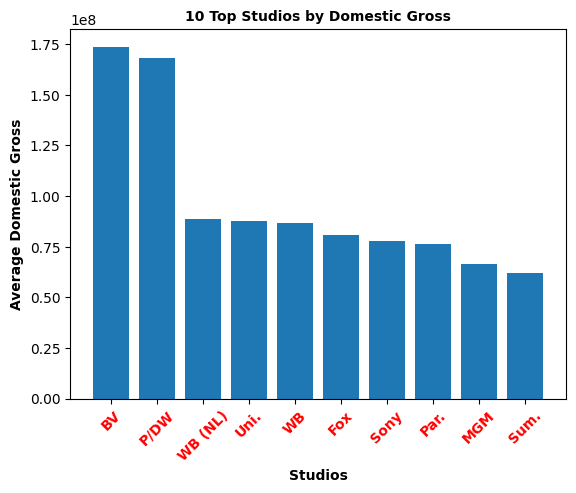

In [82]:
# plotting a bargraph
plt.bar(topmost_studios["domestic_gross"].index, topmost_studios["domestic_gross"].values)
plt.xticks(rotation = 45 , fontsize = 10 , fontweight = "bold" , color = "red")
plt.xlabel("Studios" , fontsize = 10 , fontweight = "bold")
plt.ylabel("Average Domestic Gross", fontsize = 10 , fontweight = "bold")
plt.title("10 Top Studios by Domestic Gross", fontsize = 10 , fontweight = "bold")
plt.gcf().set_size_inches = "12 ,11"
plt.show()

#### EXPLANATION

+ The bar graph above allows us to easily compare the average domestic gross for the top 10 studios.
The top most studio is BV with a domestic gross averaging at 1.75m followed closely by P/DW averaging at 1.69m. Most of the studios are averaging between 7m and 8m indicating that they are not as dominant in the industry as the top 2 studio. This therefore, will enable Miscrosoft be aware of the brands it will be competing with in the market. It will also be able to learn from the top most studios and find out what makeS BV and P/DW generate a high average domestic gross.Therefore, this information could be useful for Microsoft in determining which studios to target for potential partnerships or acquisitions.


#### Analysis of the return on investment(ROI)

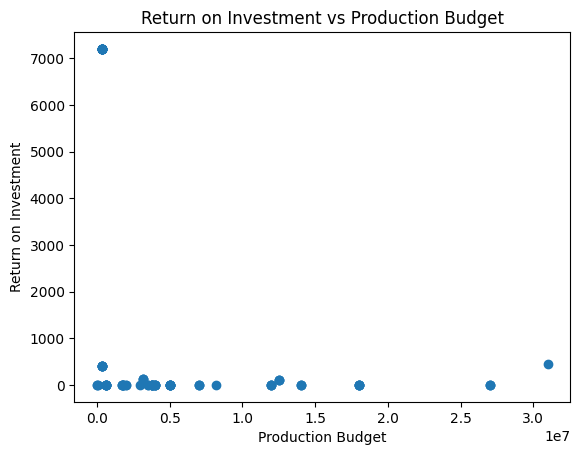

In [83]:
import matplotlib.pyplot as plt

# Creating a scatter plot
plt.scatter(merged_data['production_budget'], merged_data['Return_on_investment'])

# Setting the title and labels
plt.title('Return on Investment vs Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Return on Investment')

# Show the plot
plt.show()

### Explanation

+ The scatter plot above shows the relationship between the production budget and return on investment for the 86 movies in the dataset. Each point on the plot represents a movie, with its corresponding production budget on the x-axis and the return on investment on the y-axis.

+ A higher return on investment(ROI) means that the movie is more profitable, while a lower return on investment means that the movie is less profitable. From the scatter plot, we can see that there is a wide range of return on investment values for movies with different production budgets.

+ We can also see a general trend implying that movies with higher production budgets tend to have higher return on investment values. This makes sense, as larger budgets generally allow for better production values(volumes), more marketing, and higher-quality talents involved in the production, which when all put together, contribute to a more successful movie.

+ However, there are also some outliers where movies with relatively low budgets were able to generate high returns on investment, indicating that success is not necessarily determined by the size of the budget.

+ Overally, the scatter plot provided a useful visualization of the relationship between production budget and return on investment in the dataset, highlighting some of the trends and outliers in the data.



### Genre analysis

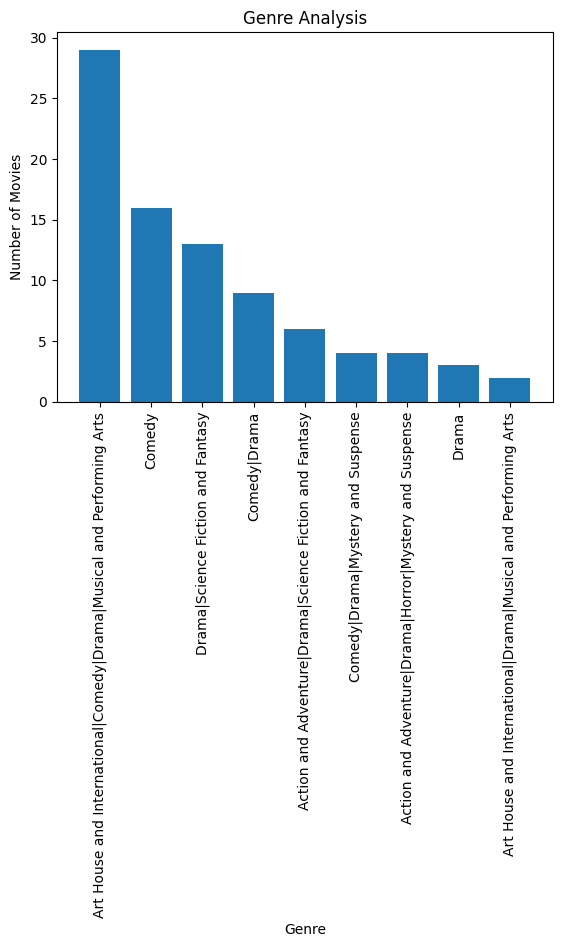

In [84]:

# counting  the number of movies in each genre
genre_counts = merged_data['genre'].value_counts()

# creating a bar graph to show the genre counts
plt.bar(genre_counts.index, genre_counts.values)

# setting the chart title and axis labels
plt.title('Genre Analysis')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

# rotating the x-axis labels to make them easier to read
plt.xticks(rotation= 90)

# displaying  the chart
plt.show()

### Explanation

+ Based on the above bar graph plot, we can see that the  that the most watched movie categorised by genre is Drama, followed by Comedy, Action, and Horror. This is evidently highlighted by the height of the bars on the y-axis. Of importance to note also is that this analysis is based on the movies included in the dataset and may not be a true representation of the overall movie industry. Furthermore, the popularity of genres may vary based on various factors such as cultural and societal influences, current events, and individual preferences.

Ratings and runtime Analysis

In [85]:
#counting the values of a particular 'runtime' value in our dataset
runtime_frequency = merged_data['runtime'].value_counts().reset_index()
runtime_frequency.columns = ['Runtime', 'Frequency']
# Sort the table based on runtime values for a better plot
runtime_frequency = runtime_frequency.sort_values(by='Runtime')
# Display the frequency distribution table
print(runtime_frequency)

   Runtime  Frequency
2     82.0         16
5     93.0          4
0     96.0         29
3     99.0          9
6    106.0          3
1    108.0         17
7    117.0          2
4    127.0          6


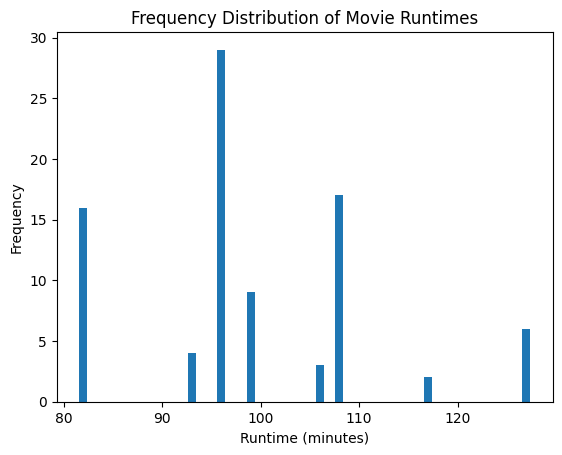

In [86]:
# Plot the frequency distribution using a bar plot
plt.bar(runtime_frequency['Runtime'], runtime_frequency['Frequency'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Movie Runtimes')
plt.show()

From the above frequency distribution,it is evident that the movies with a runtime of 96 mins had the highest frequency. This can be depicted by the lenght of the bar while the movies with a runtime of 117 mins had the lowest frequency as shown by the length of the bar.

Correlation Analysis of columns with Datatype int64

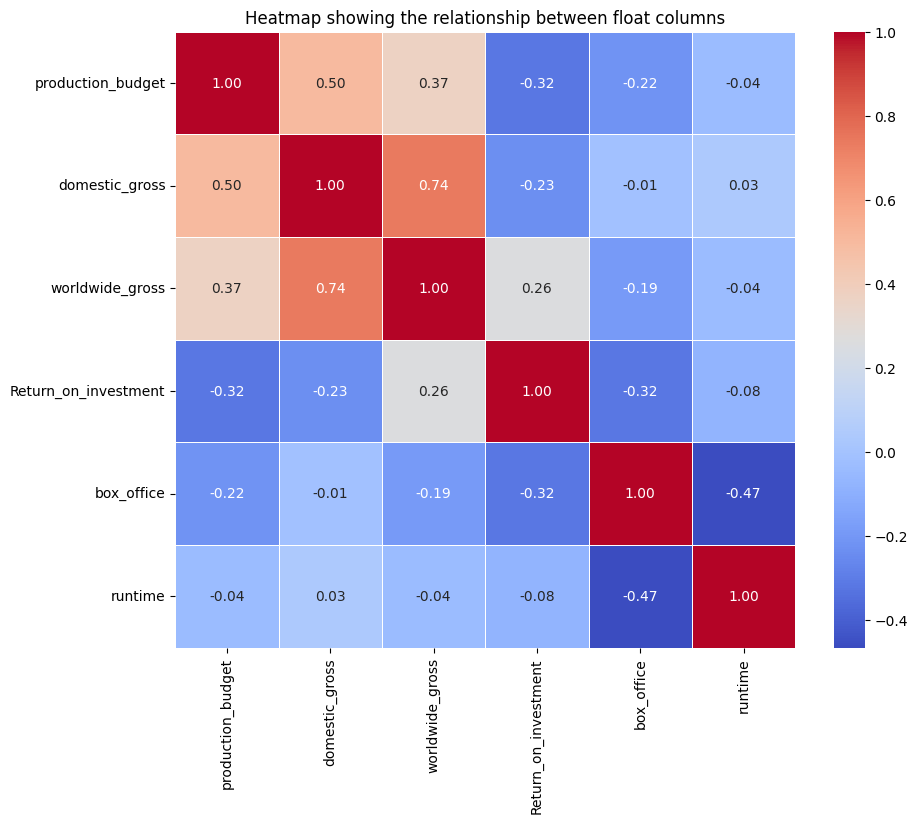

In [87]:
# Select only the columns with datatype 'float64'
float_columns = merged_data.select_dtypes(include=['float64'])

# Calculate the correlation matrix
correlation_matrix = float_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap showing the relationship between float columns')
plt.show()

The heatmap above shows how strongly correlated the float columns are with each other. A positive value indicates a positive correlation, while a negative value indicates a negative correlation.For example, there is a strong positive correlation between prodection budget and domestic gross income.

### Recommendations
+ Microsoft should consider producing Drama, Comedy, Action and Horror because they are the most watched movies.
+ Microsoft may consider more research and learn from BV and P/DW studios and discover what makes them
the best studios with the highest averaging domestic gross.
+ Microsoft should also look at other ways to make a movie successful rather than having a big production
budget. Since there is no correlation between the budget and the movies success, microsoft may consider
looking for good script writers, directors , actors and quality videos for the success of the movies.


#### Further analysis

+ Prediction of undesirable outcomes- The model could help microsoft to be prepared and that they should consider investigating possible negative outcomes that may occur so that they can look for ways and measures to mitigate them.
+ There should be More and better predictions on the genre of movies that that are a success - other factors such as marketing and advertising, critical reception, and star power can also play a role in a movie's success at the box office.
+ There should also be modelling for qualified personnel- This would tell how impactful having qualified personnel could help in realising what makes movies successful.